# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Faradissa Nurul
- **Email:** faradissanurul@gmail.com
- **ID Dicoding:** dissassa

## Menentukan Pertanyaan Bisnis

1.   Bagaimana performa Bike Rental dalam beberapa bulan terakhir?
2.   Kapan Bike Rental high and low on demand?
3. Bagaimana performa Bike Rental per tahun?
4. Kapan Peak Hours saat hari kerja dan bukan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [2]:
# Load file day.csv

day_df = pd.read_csv("https://raw.githubusercontent.com/faradissanurul/dataset_bike_rent/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
print("Jumlah data day_df per kolom: ",day_df.count())

Jumlah data day_df per kolom:  instant       731
dteday        731
season        731
yr            731
mnth          731
holiday       731
weekday       731
workingday    731
weathersit    731
temp          731
atemp         731
hum           731
windspeed     731
casual        731
registered    731
cnt           731
dtype: int64


**Insight Data day_df:**
- terdapat 16 kolom
- jumlah entri datanya sebanyak 731 data

In [4]:
# Load file hour.csv

hour_df = pd.read_csv("https://raw.githubusercontent.com/faradissanurul/dataset_bike_rent/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
print("Jumlah data hour_df per kolom: ", hour_df.count())

Jumlah data hour_df per kolom:  instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64


**Insight Data hour_df:**
- Terdapat 17 kolom.
- Jumlah entri datanya sebanyak 17379 data.

### Assessing Data

In [6]:
# Menilai data day_df

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Cek missing values day_df

day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
# Cek duplikasi data day_df

print("Jumlah duplikasi data pada day_df: ", day_df.duplicated().sum())

Jumlah duplikasi data pada day_df:  0


In [9]:
# Mengambil ringkasan nilai parameter Descriptive Statistics (numeric data only) data day_df

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Menilai data hour_df

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# Cek missing values hour_df

hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
# Cek duplikasi data hour_df

print("Jumlah duplikasi data pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi data pada hour_df:  0


In [13]:
# Mengambil ringkasan nilai parameter Descriptive Statistics (numeric data only) data hour_df

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

**Data day_df**
- Terdapat kesalahan tipe data pada kolom dteday
- Tidak terdapat missing values, duplikasi data, invalid data, inaccurate value, inconsistent value


**Data hour_df**
- Terdapat kesalahan tipe data pada
kolom dtedayvalues
- Tidak terdapat missing values, duplikasi data, invalid data, inaccurate value, inconsistent value

### Cleaning Data

In [14]:
# Mengganti tipe data pada kolom dteday pada data day_df

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
# Mengganti tipe data pada kolom dteday pada data hour_df

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data kolom ***dteday*** pada **day_df** dan **hour_df** sudah terganti dari object menjadi datetime

## Exploratory Data Analysis (EDA)

### Pertanyaan bisnis:

1.   Bagaimana performa Bike Rental dalam beberapa bulan terakhir?
2.   Kapan Bike Rental high and low on demand?
3. Bagaimana performa Bike Rental per tahun?
4. Kapan Peak Hours saat hari kerja dan bukan hari kerja?

### Explore Data day_df



In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
filtered_data = (
    day_df.groupby(by=["yr", "season", "mnth"]).agg({
    "cnt" : "sum"
    }).sort_values(by="cnt", ascending=False)
)

filtered_data.loc[0]

cnt
season mnth        
3      7     141341
       8     136691
2      5     135821
4      10    123511
       11    102167
2      4      94870
       6      93786
3      9      91892
4      12     64933
3      6      49726
1      2      48215
       3      41206
       1      38189
4      9      35526
2      3      22839
1      12     22390

In [18]:
filtered_data.loc[1]

cnt
season mnth        
3      8     214503
       7     203607
4      10    198841
2      5     195865
       4     174224
3      9     157707
4      11    152664
2      6     137168
1      2     103137
4      12    103105
1      3     100859
       1      96744
3      6      65662
2      3      64016
4      9      60866
1      12     20608

In [19]:
day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
    "temp": "mean"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt,temp
season,,,,
3,226091,835038,1061129,0.706309
2,203522,715067,918589,0.544405
4,129782,711831,841613,0.422906
1,60622,410726,471348,0.297748


In [20]:
s3_actemp = (day_df.loc[day_df['season'] == 3, 'temp'].mean()) * 41
print("Rata-rata temperature pada season Fall sebesar", float(f"{s3_actemp:.2f}"), "°C")

s2_actemp = (day_df.loc[day_df['season'] == 2, 'temp'].mean()) * 41
print("Rata-rata temperature pada season Summer sebesar", float(f"{s2_actemp:.2f}"), "°C")

s4_actemp = (day_df.loc[day_df['season'] == 4, 'temp'].mean()) * 41
print("Rata-rata temperature pada season Winter sebesar", float(f"{s4_actemp:.2f}"), "°C")

s1_actemp = (day_df.loc[day_df['season'] == 1, 'temp'].mean()) * 41
print("Rata-rata temperature pada season Spring sebesar", float(f"{s1_actemp:.2f}"), "°C")

Rata-rata temperature pada season Fall sebesar 28.96 °C
Rata-rata temperature pada season Summer sebesar 22.32 °C
Rata-rata temperature pada season Winter sebesar 17.34 °C
Rata-rata temperature pada season Spring sebesar 12.21 °C


**Insight:**
- Season Fall memiliki jumlah perental terbanyak sebanyak 1061129 user dengan rata-rata temperatur sebesar 28.96 °C
- Season Spring memiliki jumlah perental paling sedikit sebanyak 471348 user  dengan rata-rata temperatur sebesar 12.21 °C

In [21]:
day_df.groupby(["season", "weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,,casual,registered,cnt
season,weathersit,,,
3,1,167945,631498,799443
2,1,146388,480598,626986
4,1,90451,429036,519487
1,1,41562,270474,312036
4,2,37876,264634,302510
2,2,56714,231382,288096
3,2,56407,194272,250679
1,2,18779,136794,155573
4,3,1455,18161,19616


In [22]:
day_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=True)

,casual,registered,cnt
yr,,,
0,247252,995851,1243103
1,372765,1676811,2049576


In [23]:
selisih = (day_df.loc[day_df['yr'] == 1, 'cnt'].sum()) - (day_df.loc[day_df['yr'] == 0, 'cnt'].sum())
print("Jumlah kenaikan user dari tahun 2011 ke tahun 2012 adalah", selisih)

Jumlah kenaikan user dari tahun 2011 ke tahun 2012 adalah 806473


**Insight:**
- Terdapat kenaikan jumlah user dari tahun 2011 ke tahun 2012, yaitu sebesar 806473 user

In [24]:
day_df.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
mnth,,,
8,72039,279155,351194
6,73906,272436,346342
9,70323,275668,345991
7,78157,266791,344948
5,75285,256401,331686
10,59760,262592,322352
4,60802,208292,269094
11,36603,218228,254831
3,44444,184476,228920


**Insight:**
- Bulan Agustus merupakan bulan paling banyak pengguna sepeda dengan jumlah pengguna sebesar 351194 user
- Bulan Januari merupakan bulan paling sedikit pengguna dengan jumlah pengguna sebesar 134933 user

In [25]:
day_df.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


**Insight:**
- Pelanggan banyak menggunakan sepeda saat bukan pada hari libur, yaitu sebesar 3214244 user

In [26]:
day_df.groupby(by=["holiday", "weekday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

casual  registered     cnt
holiday weekday                            
0       4         59945      421530  481475
        5         77156      404140  481296
        6        153852      323955  477807
        2         57403      410693  468096
        3         54757      410888  465645
        0        140521      303506  444027
        1         54024      341874  395898
1       1         16760       42845   59605
        3          2562        4841    7403
        5          1082        5412    6494
        4          1515        2405    3920
        2           440         573    1013

**Insight:**
- Saat bukan hari libur, hari Kamis merupakan paling banyak perental sepeda dengan jumlah perental sebesar 481475 user
- Saat hari libur, hari Senin merupakan paling banyak perental sepeda dengan jumlah perental sebesar 59605 user

In [27]:
day_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
weekday,,,
5,78238,409552,487790
4,61460,423935,485395
6,153852,323955,477807
3,57319,415729,473048
2,57843,411266,469109
1,70784,384719,455503
0,140521,303506,444027


**Insight:**
- Pelanggan banyak menggunakan sepeda pada hari Jum'at (487790 user), Kamis (485395 user), dan Sabtu (477807 user)

In [28]:
day_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
workingday,,,
1,303285,1989125,2292410
0,316732,683537,1000269


**Insight:**
- Pelanggan banyak menggunakan sepeda pada hari kerja, yaitu sebanyak 2292410 user
- Jumlah pelanggan pada hari libur/weekend sebanyak 1000269 user

In [29]:
day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


**Insight:**
- Pelanggan paling banyak menggunakan sepeda saat cuaca *Clear, Few clouds, Partly cloudy, Partly cloudy,* dengan jumlah pengguna sebesar 2257952 user
- Pelanggan paling sedikit menggunakan sepeda saat cuaca *Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds,* dengan jumlah pengguna sebesar 37869 user

In [30]:
day_df.groupby(by=["weathersit", "season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
    "temp": "mean"
}).sort_values(by="cnt", ascending=False)

casual  registered     cnt      temp
weathersit season                                      
1          3       167945      631498  799443  0.720862
           2       146388      480598  626986  0.563402
           4        90451      429036  519487  0.404918
           1        41562      270474  312036  0.301221
2          4        37876      264634  302510  0.446267
           2        56714      231382  288096  0.520739
           3        56407      194272  250679  0.674583
           1        18779      136794  155573  0.293678
3          4         1455       18161   19616  0.456341
           3         1739        9268   11007  0.592228
           1          281        3458    3739  0.268523
           2          420        3087    3507  0.365278

**Insight:**
- Pada cuaca Clear, Few clouds, Partly cloudy, Partly cloudy, sepeda paling banyak disewa pada Season Fall sebanyak 799443 user dengan rata-rata temperature
- pada cuaca Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, sepeda paling banyak disewa pada Season Winter sebanyak 302510 user dengan rata-rata temperature sebesar
- pada cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, sepeda paling banyak disewa pada Season Winter sebanyak 19616 user

In [31]:
hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


**Insight:**
- Pengguna paling banyak menggunakan sepeda sekitar pada pukul 5 sore (336860 user), 6 sore (309772 user), dan 8 pagi (261001 user)
- Pengguna paling sedikit menggunakan sepeda sekitar pada pukul 4 pagi (4428 user), 3 pagi (8174 user), dan 5 pagi (14261 user)

In [32]:
hour_df.groupby(by=["workingday", "hr"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

cnt
workingday hr        
1          17  262120
           18  245129
           8   236595
           19  173504
           16  146268
           7   144144
           20  124360
           9   119793
           15  100263
           12   99808
           13   98818
           21   92771
           14   91419
0          13   86101
           12   84606
           14   84233
           15   82886
           16   81480
1          11   78482
0          17   74740
           11   72838
1          22   68918
           10   67142
0          18   64643
           10   59115
           19   53285
1          6    50840
           23   44177
0          20   40190
           9    39645
           21   32674
           22   26694
           8    24406
           0    20884
           23   19764
1          0    18246
0          1    15987
1          5    12332
0          2    12123
           7    10027
1          1     8177
0          3     5851
           6     4292
1          2     4229
           4     2552
           3     2323
0          5     1929
           4     1876

In [33]:
hour_df.groupby(by=["hr", "workingday"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,,cnt
hr,workingday,
17,1,262120
18,1,245129
8,1,236595
19,1,173504
16,1,146268
7,1,144144
20,1,124360
9,1,119793
15,1,100263


Range Peak Hour on Workingday:
*   Morning: 7, 8, 9
*   Afternoon: 12, 13, 14, 15, 16, 17
*   Evening: 18, 19, 20, 21

In [34]:
# Pivot table based on workingday and hour

filtered_hr = (
    hour_df.groupby(by=["workingday", "hr"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt" : "sum"
    }).sort_values(by="cnt", ascending=False)
)

In [35]:
# Peak Hours based on Workingday
filtered_hr.loc[1].head(3)

,casual,registered,cnt
hr,,,
17,28391,233729,262120
18,25125,220004,245129
8,11043,225552,236595


**Insight:**
- Pada hari kerja, sepeda banyak rental pada jam 5 sore (262120 user), 6 sore (245129 user), dan 8 pagi (236595 user)

In [36]:
# Peak Hours based on Not Workingday
filtered_hr.loc[0].head(3)

,casual,registered,cnt
hr,,,
13,31514,54587,86101
12,29163,55443,84606
14,32246,51987,84233


**Insight:**
-  Pada bukan hari kerja, sepeda banyak rental pada jam 1 siang (86101 user), 12 siang (84606 user), dan 14 siang (84233 user)
- Jumlah Casual dan Registered user memiliki selisih yang tidak jauh berbeda (sama-sama dalam puluhan ribu)

In [37]:
# Menemukan Pengguna tertinggi berdasarkan Tanggal

# Find the row with the maximum 'cnt'
max_row = day_df.loc[day_df['cnt'].idxmax()]

# Find the row with the minimum 'cnt'
min_row = day_df.loc[day_df['cnt'].idxmin()]

# Extract the date and maximum count

max_date = max_row['dteday']
max_cnt = max_row['cnt']

# Extract the date and maximum count
min_date = min_row['dteday']
min_cnt = min_row['cnt']

# Print the row with the maximum 'cnt'
print("Pengguna sepeda tertinggi berada pada tanggal: ", max_date, "sejumlah", max_cnt, "user")

# Print the row with the minimum 'cnt'
print("Pengguna sepeda terendah berada pada tanggal: ", min_date, "sejumlah", min_cnt, "user")

Pengguna sepeda tertinggi berada pada tanggal:  2012-09-15 00:00:00 sejumlah 8714 user
Pengguna sepeda terendah berada pada tanggal:  2012-10-29 00:00:00 sejumlah 22 user


In [38]:
day_df[day_df['cnt'] == day_df['cnt'].max()]

# 0.495385	0.474354	0.627894	0.190486

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


In [39]:
max_actemp = 0.608333 * 41
max_acatemp = 0.585867 * 50
max_hum = 0.501667 * 100
max_windspeed = 0.247521 * 67

print("Temperature pada tanggal 2012-09-15 sebesar", float(f"{max_actemp:.2f}"), "°C")
print("Atemp pada tanggal 2012-09-15 sebesar", float(f"{max_acatemp:.2f}"), "°C")
print("Humidity pada tanggal 2012-09-15 sebesar", float(f"{max_hum:.2f}"), "%")
print("Windspeed pada tanggal 2012-09-15 sebesar", float(f"{max_windspeed:.2f}"), "m/s")

Temperature pada tanggal 2012-09-15 sebesar 24.94 °C
Atemp pada tanggal 2012-09-15 sebesar 29.29 °C
Humidity pada tanggal 2012-09-15 sebesar 50.17 %
Windspeed pada tanggal 2012-09-15 sebesar 16.58 m/s


In [40]:
day_df[day_df['cnt'] == day_df['cnt'].min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22


In [41]:
min_actemp = 0.44 * 41
min_acatemp = 0.4394 * 50
min_hum = 0.88 * 100
min_windspeed = 0.3582 * 67

print("Temperature pada tanggal 2012-10-29 sebesar", float(f"{min_actemp:.2f}"), "°C")
print("Atemp pada tanggal 2012-10-29 sebesar", float(f"{min_acatemp:.2f}"), "°C")
print("Humidity pada tanggal 2012-10-29 sebesar", float(f"{min_hum:.2f}"), "%")
print("Windspeed pada tanggal 2012-10-29 sebesar", float(f"{min_windspeed:.2f}"), "m/s")

Temperature pada tanggal 2012-10-29 sebesar 18.04 °C
Atemp pada tanggal 2012-10-29 sebesar 21.97 °C
Humidity pada tanggal 2012-10-29 sebesar 88.0 %
Windspeed pada tanggal 2012-10-29 sebesar 24.0 m/s


In [42]:
mean_actemp = day_df['temp'].mean() * 41
mean_acatemp = day_df['atemp'].mean() * 50
mean_hum = day_df['hum'].mean() * 100
mean_windspeed = day_df['windspeed'].mean() * 67
print("Rata-rata temperature pada day_df sebesar", float(f"{mean_actemp:.2f}"), "°C")
print("Rata-rata atemp pada day_df sebesar", float(f"{mean_acatemp:.2f}"), "°C")
print("Rata-rata humidity pada day_df sebesar", float(f"{mean_hum:.2f}"), "%")
print("Rata-rata windspeed pada day_df sebesar", float(f"{mean_windspeed:.2f}"), "m/s")

Rata-rata temperature pada day_df sebesar 20.31 °C
Rata-rata atemp pada day_df sebesar 23.72 °C
Rata-rata humidity pada day_df sebesar 62.79 %
Rata-rata windspeed pada day_df sebesar 12.76 m/s


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana performa Bike Rental dalam beberapa bulan terakhir?

In [43]:
monthly_bikerent_df = day_df.resample(rule='ME', on= "dteday").agg({
    "cnt": "sum"
})

monthly_bikerent_df.index = monthly_bikerent_df.index.strftime('%Y/%m')
monthly_bikerent_df = monthly_bikerent_df.reset_index()
monthly_bikerent_df.rename(columns={
    "cnt": "total_user"
}, inplace=True)
monthly_bikerent_df.head()

,dteday,total_user
0,2011/01,38189
1,2011/02,48215
2,2011/03,64045
3,2011/04,94870
4,2011/05,135821


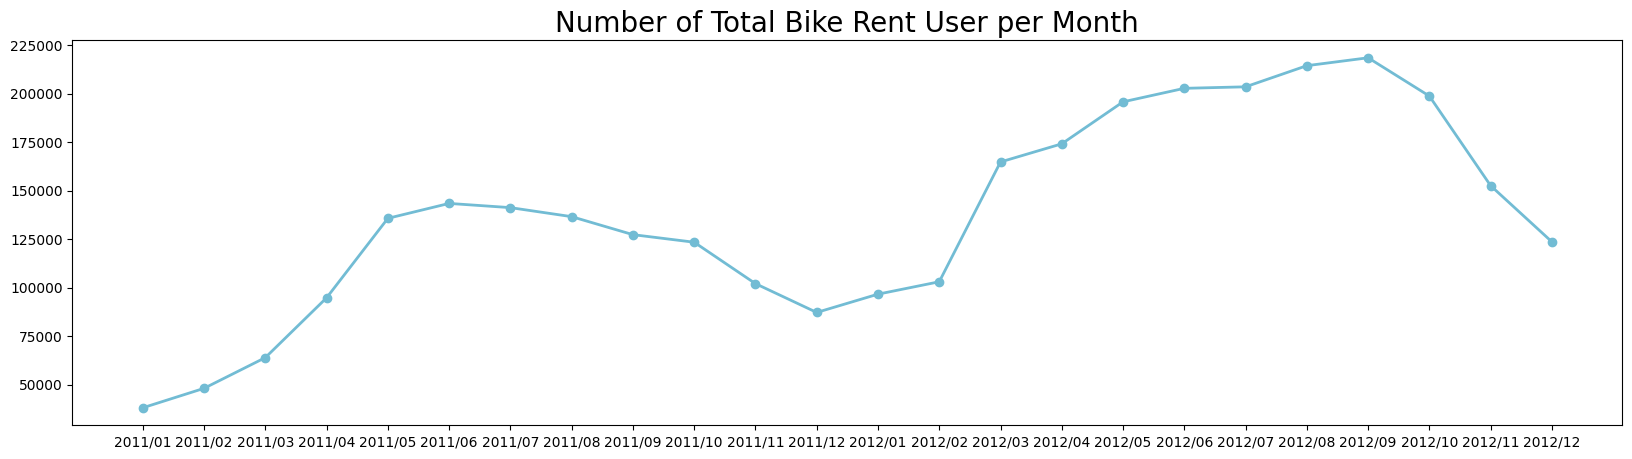

In [44]:
monthly_bikerent_df = day_df.resample(rule='ME', on= "dteday").agg({
    "cnt": "sum"
})

monthly_bikerent_df.index = monthly_bikerent_df.index.strftime('%Y/%m')
monthly_bikerent_df = monthly_bikerent_df.reset_index()
monthly_bikerent_df.rename(columns={
    "cnt": "total_user"
}, inplace=True)

plt.figure(figsize=(20, 5))
plt.plot(monthly_bikerent_df['dteday'], monthly_bikerent_df['total_user'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Total Bike Rent User per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

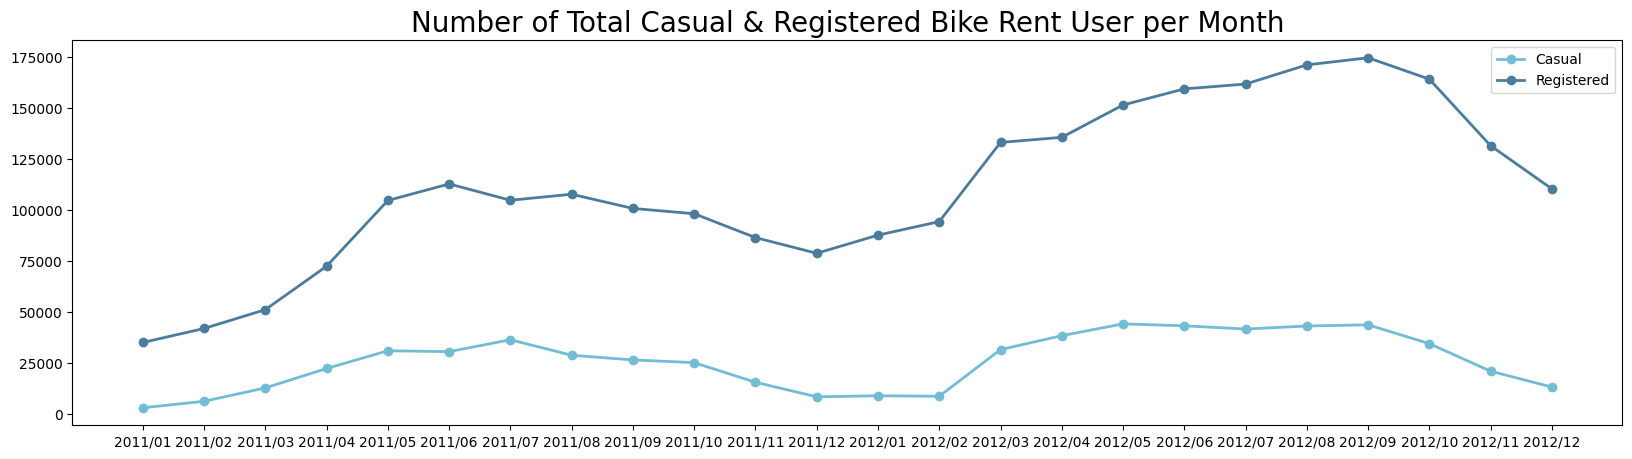

In [45]:
monthly_user_bikerent_df = day_df.resample(rule='ME', on= "dteday").agg({
    "casual": "sum",
    "registered": "sum"
})

monthly_user_bikerent_df.index = monthly_user_bikerent_df.index.strftime('%Y/%m')
monthly_user_bikerent_df = monthly_user_bikerent_df.reset_index()
monthly_user_bikerent_df.rename(columns={
    "casual": "total_casual_user",
    "registered": "total_registered_user"
}, inplace=True)

plt.figure(figsize=(20, 5))
plt.plot(monthly_user_bikerent_df['dteday'], monthly_user_bikerent_df['total_casual_user'], marker='o', linewidth=2, color="#72BCD4",label="Casual")
plt.plot(monthly_user_bikerent_df['dteday'], monthly_user_bikerent_df['total_registered_user'], marker='o', linewidth=2, color="#4C7C9B",label="Registered")
plt.title("Number of Total Casual & Registered Bike Rent User per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

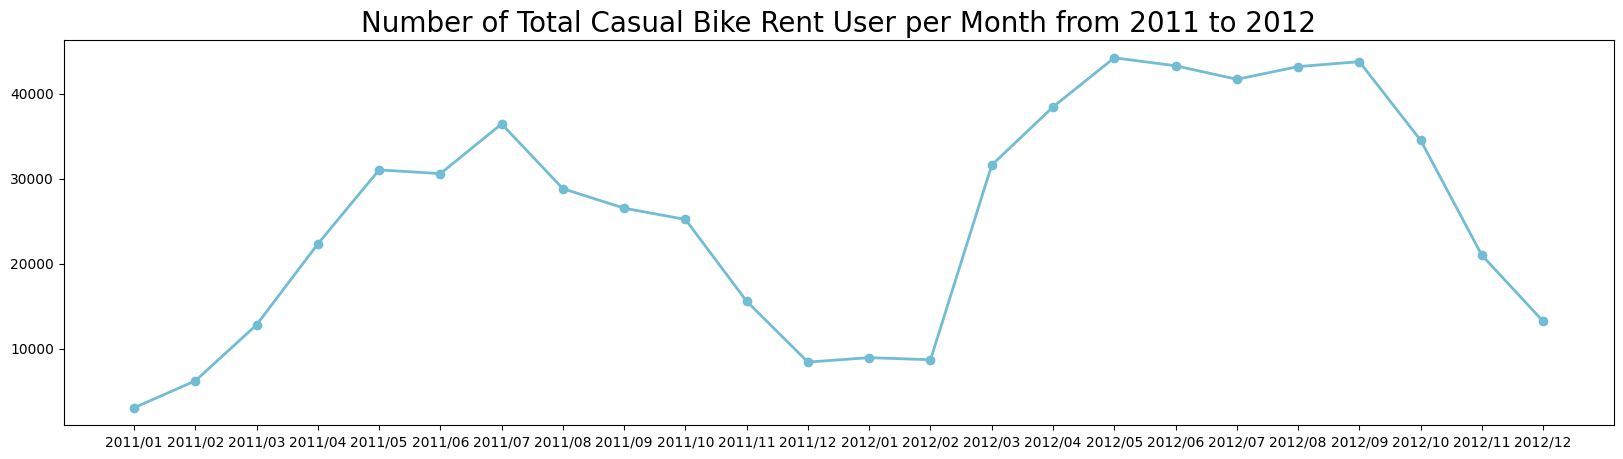

In [46]:
monthly_casual_bikerent_df = day_df.resample(rule='ME', on= "dteday").agg({
    "casual": "sum"
})

monthly_casual_bikerent_df.index = monthly_casual_bikerent_df.index.strftime('%Y/%m')
monthly_casual_bikerent_df = monthly_casual_bikerent_df.reset_index()
monthly_casual_bikerent_df.rename(columns={
    "casual": "total_casual_user"
}, inplace=True)

plt.figure(figsize=(20, 5))
plt.plot(monthly_casual_bikerent_df['dteday'], monthly_casual_bikerent_df['total_casual_user'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Total Casual Bike Rent User per Month from 2011 to 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

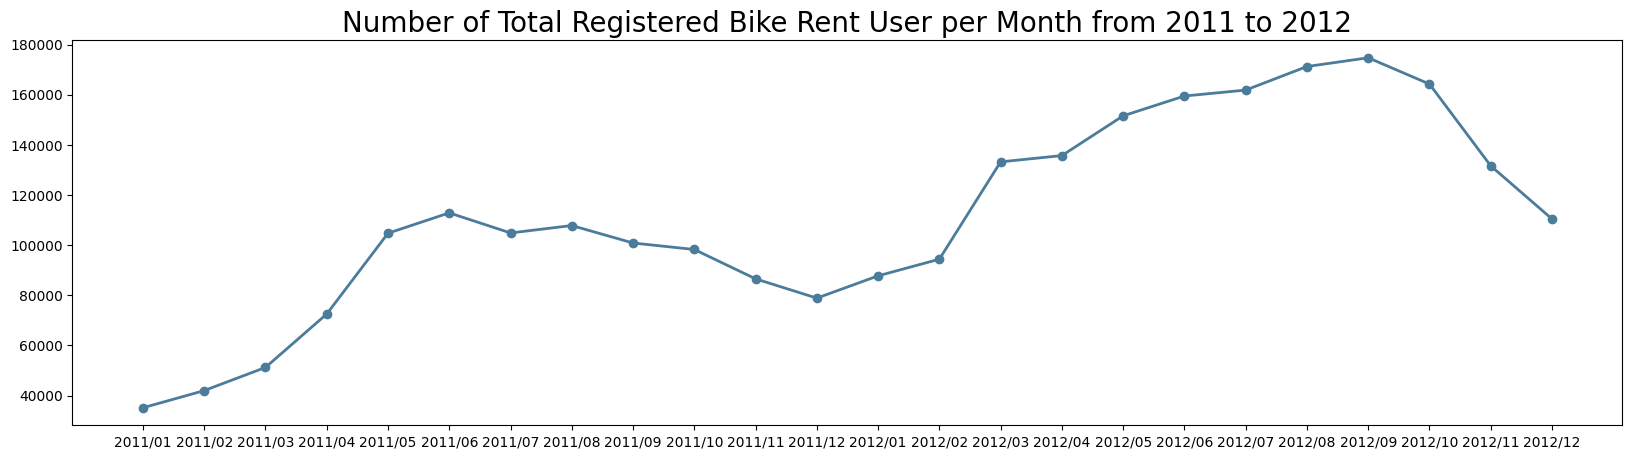

In [47]:
monthly_registered_bikerent_df = day_df.resample(rule='ME', on= "dteday").agg({
    "registered": "sum"
})

monthly_registered_bikerent_df.index = monthly_registered_bikerent_df.index.strftime('%Y/%m')
monthly_registered_bikerent_df = monthly_registered_bikerent_df.reset_index()
monthly_registered_bikerent_df.rename(columns={
    "registered": "total_registered_user"
}, inplace=True)

plt.figure(figsize=(20, 5))
plt.plot(monthly_registered_bikerent_df['dteday'], monthly_registered_bikerent_df['total_registered_user'], marker='o', linewidth=2, color="#4C7C9B")
plt.title("Number of Total Registered Bike Rent User per Month from 2011 to 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:
Kapan Bike Rental high and low on demand?
(Berdasarkan Season, Month, dan Weekday)

In [48]:
# Berdasarkan Season

season_df = day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()
season_df.head()

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


In [49]:
# Change value of season to be categorical
ssn = [1, 2, 3, 4]

ssn_dict={
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

day_df["c_season"] = day_df['season'].apply(lambda x: ssn_dict[x])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,c_season
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Springer
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Springer
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Springer
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Springer
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Springer


<ipython-input-50-4508ec0a649b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


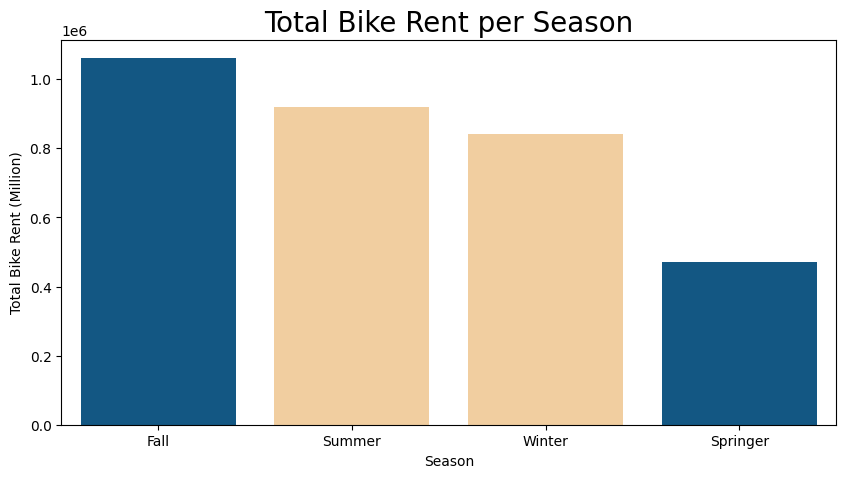

In [50]:
# High and Low Demand based on Season Bar Chart

season_df = day_df.groupby(by="c_season").cnt.sum().sort_values(ascending=False).reset_index()
season_df.rename(columns={
    "cnt": "total_user"
}, inplace=True)
season_df

plt.figure(figsize=(10,5))

colors = ["#005B96", "#ffd092", "#ffd092", "#005B96"]

sns.barplot(
    x="c_season",
    y="total_user",
    data=season_df,
    palette=colors
)
plt.title("Total Bike Rent per Season", loc="center", fontsize=20)
plt.xlabel("Season")
plt.ylabel("Total Bike Rent (Million)")
plt.show()

In [51]:
# Change value of mnth to be categorical
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

month_dict={
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

day_df["month"] = day_df['mnth'].apply(lambda x: month_dict[x])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,c_season,month
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Springer,January
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Springer,January
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Springer,January
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Springer,January
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Springer,January


<ipython-input-52-264589e5f2ea>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


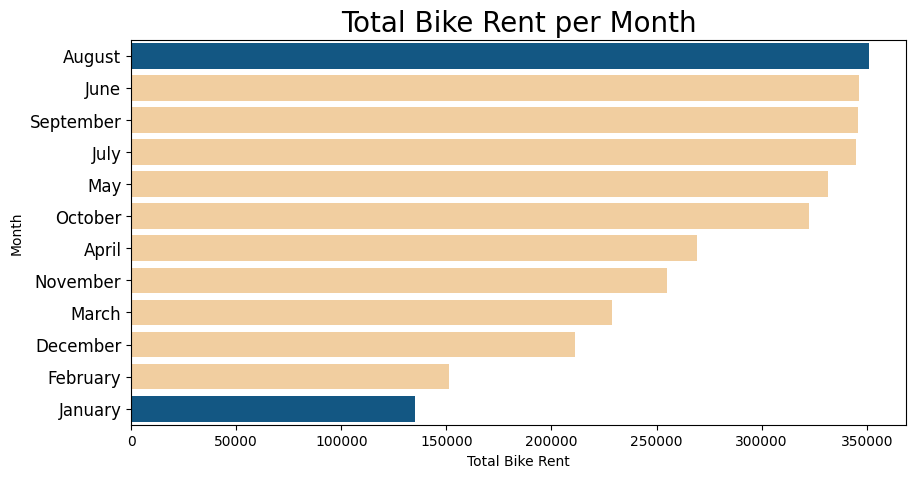

In [52]:
# High and Low Demand based on Month

plt.figure(figsize=(10, 5))

colors = ["#005B96", "#ffd092", "#ffd092", "#ffd092", "#ffd092", "#ffd092", "#ffd092", "#ffd092", "#ffd092", "#ffd092", "#ffd092", "#005B96"]

month_df = day_df.groupby(by="month").cnt.sum().sort_values(ascending=False).reset_index()
sns.barplot(
    x="cnt",
    y="month",
    data=month_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Total Bike Rent per Month", loc="center", fontsize=20)
plt.ylabel("Month")
plt.xlabel("Total Bike Rent")
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [53]:
# Change value of weekday to be categorical
weekday = [0, 1, 2, 3, 4, 5, 6]

weekday_dict={
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
}

day_df["day"] = day_df['weekday'].apply(lambda x: weekday_dict[x])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,c_season,month,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Springer,January,Saturday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Springer,January,Sunday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Springer,January,Monday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Springer,January,Tuesday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Springer,January,Wednesday


<ipython-input-54-88c3a050731e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


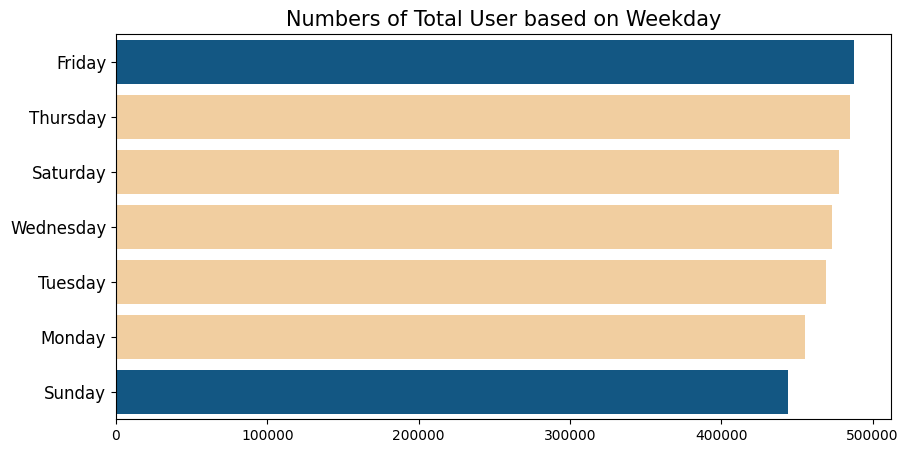

In [54]:
# High and Low Demand based on Weekday
weekday_df = day_df.groupby(by="day").cnt.sum().reset_index()
weekday_df.rename(columns={
    "cnt": "total_user"
},inplace=True)

plt.figure(figsize=(10, 5))
colors = ["#005B96", "#ffd092", "#ffd092", "#ffd092", "#ffd092", "#ffd092", "#005B96"]

sns.barplot(
    x="total_user",
    y="day",
    data=weekday_df.sort_values(by="total_user", ascending=False),
    palette=colors
)

plt.title("Numbers of Total User based on Weekday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


### Pertanyaan 3:
Bagaimana performa Bike Rental per tahun?

In [55]:
# Change value of yr to be categorical
day_df['year'] = day_df['yr'].apply(lambda x: "2011" if x == 0 else "2012")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,c_season,month,day,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Springer,January,Saturday,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Springer,January,Sunday,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Springer,January,Monday,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Springer,January,Tuesday,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Springer,January,Wednesday,2011


In [56]:
# Performa Bike Rental dari tahun ke tahun
year_df = day_df.groupby(by="year").cnt.sum().reset_index()
year_df.rename(columns={
    "cnt": "total_user"
}, inplace=True)
year_df

# Calculate percentage growth
year_df['growth'] = year_df['total_user'].pct_change() * 100
year_df.head()

,year,total_user,growth
0,2011,1243103,NaN
1,2012,2049576,64.875799


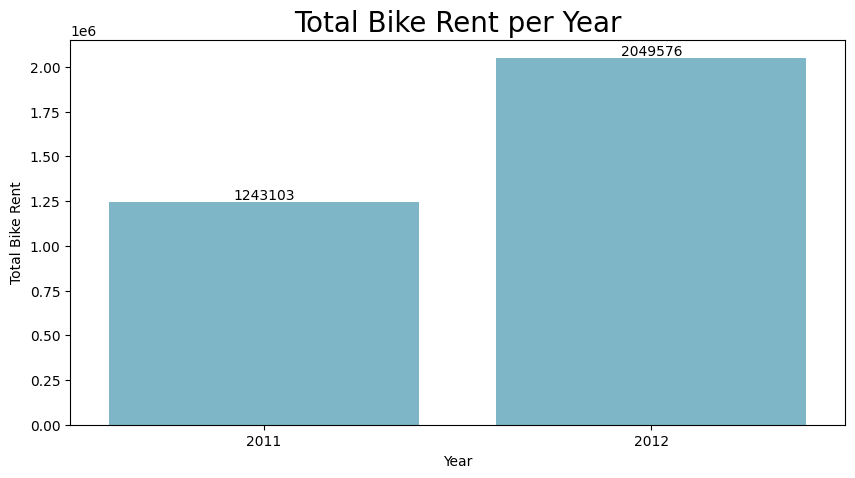

In [57]:
plt.figure(figsize=(10,5))

year_bar = sns.barplot(x="year", y="total_user", data=year_df, color="#72BCD4")
year_bar.bar_label(year_bar.containers[0], fmt='%.0f')
plt.title("Total Bike Rent per Year", loc="center", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Total Bike Rent")
plt.show()

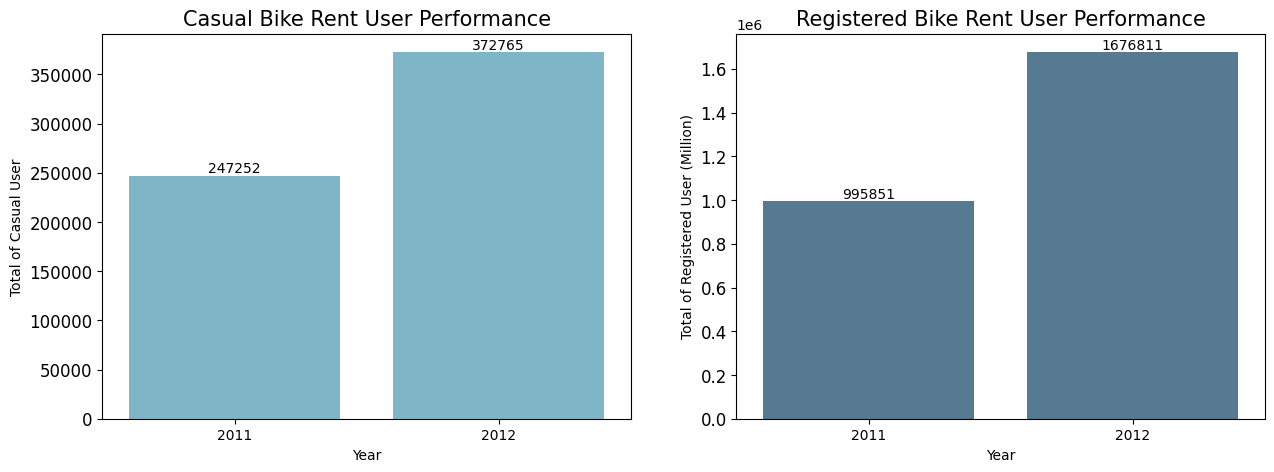

In [58]:
# Bike Rent Casual User & Registered User Per Year Bar Chart

year_df = day_df.groupby(by="year").agg({
    "casual": "sum",
    "registered": "sum",
}).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.barplot(
    x="year",
    y="casual",
    data=year_df,
    ax=ax[0],
    color="#72BCD4"
)
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Total of Casual User")
ax[0].set_title("Casual Bike Rent User Performance", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x="year",
    y="registered",
    data=year_df,
    ax=ax[1],
    color="#4C7C9B"
)
ax[1].bar_label(ax[1].containers[0], fmt='%.0f')
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Total of Registered User (Million)")
ax[1].set_title("Registered Bike Rent User Performance", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

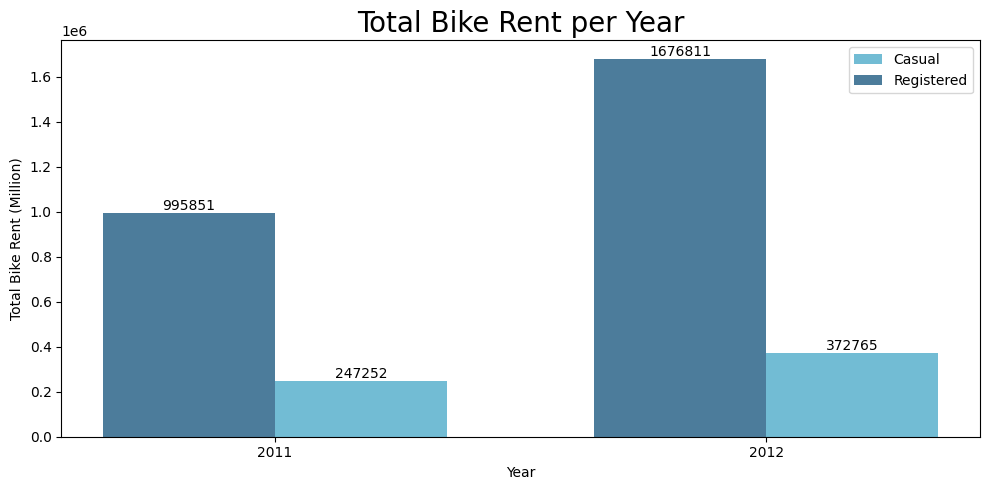

In [59]:
# Berdasarkan Tipe User Grouped Bar Chart

year_df = day_df.groupby(by="year").agg({
    "casual": "sum",
    "registered": "sum",
}).reset_index()

x =  np.arange(len(year_df['year']))
width = 0.35

plt.figure(figsize=(10,5))

casual_bar = plt.bar(x + width/2, year_df['casual'], width, label="Casual", color="#72BCD4")
registered_bar = plt.bar(x - width/2, year_df['registered'], width, label="Registered", color="#4C7C9B")

plt.bar_label(casual_bar, fmt='%.0f')
plt.bar_label(registered_bar, fmt='%.0f')
plt.title("Total Bike Rent per Year", loc="center", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Total Bike Rent (Million)")
plt.xticks(x, year_df['year'])
plt.legend()

plt.ylim(ymin=0)
plt.tight_layout()
plt.show()

### Pertanyaan 4:
Kapan Peak Hours saat hari kerja dan bukan hari kerja?

In [60]:
peak_hour_df = hour_df.groupby(by=["workingday", "hr"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).reset_index()
peak_hour_df.head()

,workingday,hr,cnt
0,1,17,262120
1,1,18,245129
2,1,8,236595
3,1,19,173504
4,1,16,146268


<ipython-input-61-ba835228c902>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


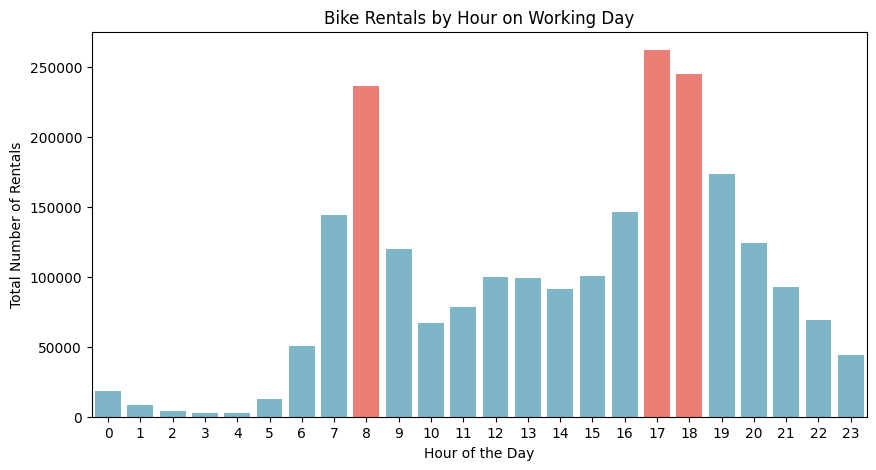

In [61]:
# Peak Hours based on Workingday

workingday_data = peak_hour_df[peak_hour_df['workingday'] == 1]
grouped_data = workingday_data.groupby('hr')['cnt'].sum().reset_index()

top_3_hours = grouped_data.nlargest(3, 'cnt')['hr'].tolist()

colors = ['#FF6F61' if hr in top_3_hours else '#72BCD4' for hr in grouped_data['hr']]

plt.figure(figsize=(10, 5))

sns.barplot(
    x=grouped_data['hr'],
    y=grouped_data['cnt'],
    palette=colors
)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Rentals')
plt.title('Bike Rentals by Hour on Working Day')
plt.show()


<ipython-input-62-c8e7d5994473>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrouped_data['hr'],


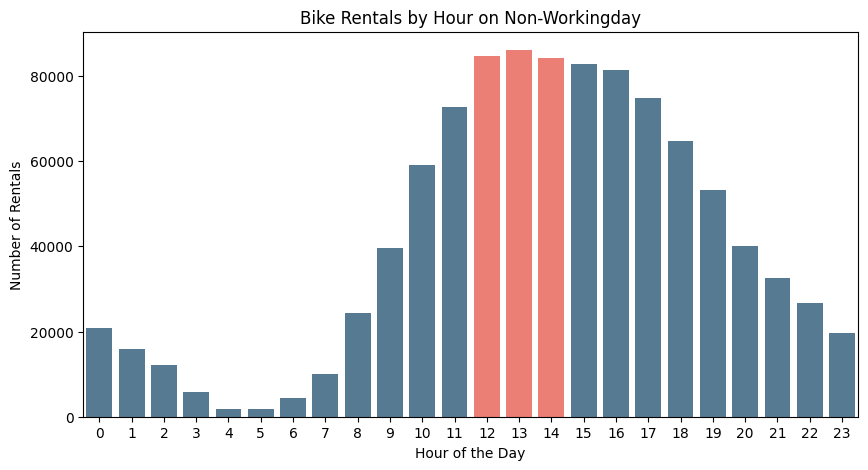

In [62]:
# Peak Hours based on Non-Workingday

non_workingday_data = peak_hour_df[peak_hour_df['workingday'] == 0]
ngrouped_data = non_workingday_data.groupby('hr')['cnt'].sum().reset_index()

top_3_hours = ngrouped_data.nlargest(3, 'cnt')['hr'].tolist()

colors = ['#FF6F61' if hr in top_3_hours else '#4C7C9B' for hr in ngrouped_data['hr']]

plt.figure(figsize=(10,5))

sns.barplot(x=ngrouped_data['hr'],
            y=ngrouped_data['cnt'],
            palette=colors
)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.title('Bike Rentals by Hour on Non-Workingday')
plt.show()

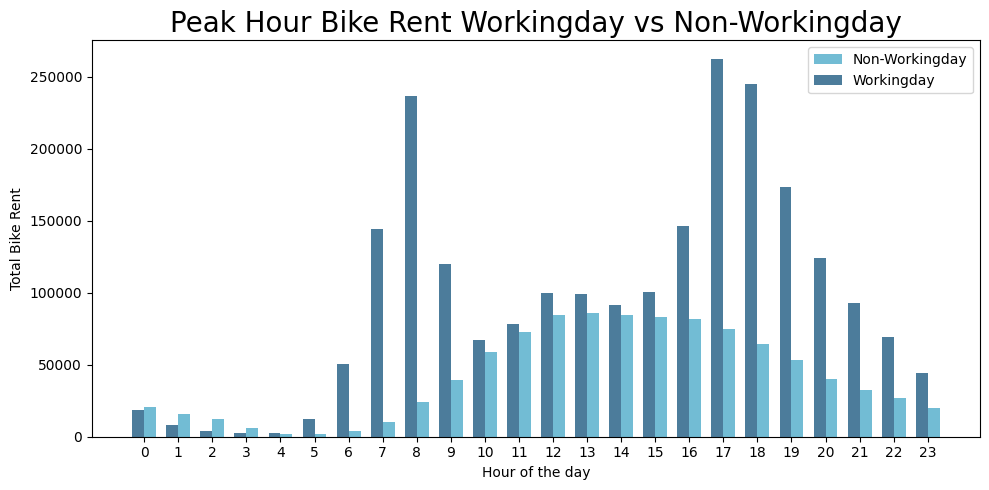

In [63]:
# Peak Hours based on Workingday vs Non-Workingday Grouped Bar Chart

peak_hour_df = hour_df.groupby(by=["workingday", "hr"]).agg({
    "cnt": "sum"
}).reset_index()

x =  np.arange(len(peak_hour_df['hr'].unique()))
width = 0.35

plt.figure(figsize=(10,5))

plt.bar(x + width/2, peak_hour_df[peak_hour_df['workingday'] == 0]['cnt'].values, width, label="Non-Workingday", color="#72BCD4")
plt.bar(x - width/2,  peak_hour_df[peak_hour_df['workingday'] == 1]['cnt'].values, width, label="Workingday", color="#4C7C9B")

plt.title("Peak Hour Bike Rent Workingday vs Non-Workingday", loc="center", fontsize=20)
plt.xlabel("Hour of the day")
plt.ylabel("Total Bike Rent")
plt.xticks(x, peak_hour_df['hr'].unique())
plt.legend()

plt.ylim(ymin=0)
plt.tight_layout()
plt.show()

**Insight:**

**1.   Bagaimana performa Bike Rental dalam beberapa bulan terakhir?**
*   **Rental sepeda mengalami puncak kenaikan** di bulan Mei 2011, Maret 2012, dan Oktober 2012.
*   **Rental sepeda mengalami penurunan** di bulan Desember 2011 dan Desember 2012.
*   **Berdasarkan Casual User**, rental sepeda mengalami puncak kenaikan di bulan Juli 2011, Mei 2012, dan September 2012; dan mengalami penurunan di bulan Desember 2011 dan Desember 2012.
*   **Berdasarkan Registered User**, rental sepeda mengalami puncak kenaikan di bulan Juni 2011, Maret 2012, dan September 2012; dan mengalami penurunan di bulan Desember 2011 dan Desember 2012

**2.   Kapan Bike Rental high and low on demand?**
*   **Berdasarkan Season**, High on Demand: musim gugur (Fall) dan Low on Demand: musim semi (Springer)
*   **Berdasarkan Bulan**, High on Demand: bulan Agustus dan Low on Demand: bulan Januari
* **Berdasarkan Hari**, High on Demand: hari Jum'at dan Low on Demand: hari Minggu

**3. Bagaimana performa Bike Rental per tahun?**
*   **Terdapat kenaikan** jumlah perental sepeda dari tahun 2011 sampai tahun 2012, pada tahun 2011 perusahaan memiliki 1.24 juta user, pada tahun 2012 perusahaan memiliki 2.05 juta user  
*   Berdasarkan tipe user-nya, Casual user  dan Registered user memiliki peningkatan pengguna.
*   **Casual user** memiliki peningkatan sebanyak 125513 user
*   **Registered user** memiliki peningkatan sebanyak 680960 user

**4. Kapan Peak Hours saat hari kerja dan bukan hari kerja?**
*   **Saat hari kerja**, sepeda paling banyak dirental pada jam 5 sore, 6 sore, dan 8 pagi
*  **Saat bukan hari kerja**, sepeda paling banyak dirental pada jam 1 siang, 12 siang, dan 2 siang


## Analisis Lanjutan (Opsional)

## Conclusion


**1.   Bagaimana performa Bike Rental dalam beberapa bulan terakhir?**
*   **Rental sepeda mengalami puncak kenaikan** di bulan Mei 2011, Maret 2012, dan Oktober 2012.
*   **Rental sepeda mengalami penurunan** di bulan Desember 2011 dan Desember 2012.

**2.   Kapan Bike Rental high and low on demand?**
*   **Berdasarkan Season**, High on Demand: musim gugur (Fall) dan Low on Demand: musim semi (Springer)
*   **Berdasarkan Bulan**, High on Demand: bulan Agustus dan Low on Demand: bulan Januari
* **Berdasarkan Hari**, High on Demand: hari Jum'at dan Low on Demand: hari Minggu

**3. Bagaimana performa Bike Rental per tahun?**
*   **Terdapat kenaikan** jumlah perental sepeda dari tahun 2011 sampai tahun 2012, pada tahun 2011 perusahaan memiliki 1.24 juta user, pada tahun 2012 perusahaan memiliki 2.05 juta user  
*   Berdasarkan tipe user-nya, Casual user  dan Registered user memiliki peningkatan pengguna.

**4. Kapan Peak Hours saat hari kerja dan bukan hari kerja?**
*   **Saat hari kerja**, sepeda paling banyak dirental pada jam 8 pagi, 5 sore, dan 6 sore
*  **Saat bukan hari kerja**, sepeda paling banyak dirental pada jam 12 siang, 1 siang, dan 2 siang

In [64]:
all_df = pd.merge(
    left = hour_df,
    right = day_df,
    how = "left",
    left_on = "dteday",
    right_on = "dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,c_season,month,day,year
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.363625,0.805833,0.160446,331,654,985,Springer,January,Saturday,2011
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.363625,0.805833,0.160446,331,654,985,Springer,January,Saturday,2011
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.363625,0.805833,0.160446,331,654,985,Springer,January,Saturday,2011
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.363625,0.805833,0.160446,331,654,985,Springer,January,Saturday,2011
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.363625,0.805833,0.160446,331,654,985,Springer,January,Saturday,2011


In [65]:
all_df.describe()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947


In [66]:
all_df.to_csv("all_df.csv", index=False)